In [55]:
'''
@2023/5/18 by Ye Jinbiao
'''
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numexpr
#画图功能开启中文支持
import matplotlib
matplotlib.rc("font",family='YouYuan')
#取消warning
warnings.filterwarnings("ignore")
'''
任务1： 42张表缺失日期
                列表格说明-说明哪几个数据集是存在日期缺失的
'''
baseDir = './Datas'
missing_dates_dict = dict()
all_missing_dates_df = pd.DataFrame(columns=['filename', 'missing_dates'])
for file in os.listdir(baseDir):
    path = os.path.join(baseDir,file)
    '''
        表12的数据存在问题，跳过处理！
    '''
    if path == './Datas\plant_12.xlsx':
        continue
    #print(path)
    df = pd.read_excel(path)
    '''

    '''
    df['入炉日期'] = pd.to_datetime(df['入炉日期'])
    df = df.set_index('入炉日期')
    new_index = pd.date_range(start='2020-1-1', end='2020-12-31', freq='D')
    missing_dates = sorted(set(new_index) - set(df.index))
    missing_dates_str = [date.strftime('%Y-%m-%d') for date in missing_dates]
    missing_dates_dict[file] = missing_dates_str
    temp_df = pd.DataFrame({
        'filename': [file] * len(missing_dates_str),
        'missing_dates': missing_dates_str
    })
    all_missing_dates_df = pd.concat([all_missing_dates_df, temp_df])
    print(file+':')
    print(missing_dates_str)
print(all_missing_dates_df)

plant_01.xlsx:
[]
plant_02.xlsx:
[]
plant_03.xlsx:
[]
plant_04.xlsx:
[]
plant_05.xlsx:
[]
plant_06_01.xlsx:
[]
plant_06_02.xlsx:
[]
plant_07.xlsx:
['2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18']
plant_08.xlsx:
[]
plant_09.xlsx:
['2020-08-30', '2020-08-31']
plant_10.xlsx:
[]
plant_11.xlsx:
[]
plant_13.xlsx:
[]
plant_14_01.xlsx:
['2020-06-20', '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22', '20

In [53]:
#保存到 缺失日期.csv
all_missing_dates_df.to_csv("缺失日期.csv")

In [ ]:
'''
任务2： 基于转换矩阵的煤质数据自洽性检验
                直接检验【收到基】列就行
                收到基灰分 Aar(%)
                收到基挥发分 Var(%)
                收到基固定碳  FCar(%)
                收到基全硫St,ar%
                相当于去通过公式去计算一列新的收到基，（新-旧）/旧【真实数据和换算数据差】
'''

![转换矩阵](./转换矩阵.png)

In [84]:
baseDir = './Datas'
display_column_list = ['入炉日期','入炉煤量（吨）','全水分/收到基水分 Mt/Mar (%)','空干基水分 Mad (%)','收到基灰分 Aar(%)','Aar(%)理论值','Aar(%)差距','收到基挥发分 Var(%)','Var(%)理论值','Var(%)差距','收到基固定碳  FCar(%)','FCar(%)理论值','FCar(%)差距','收到基全硫St,ar%','St,ar%理论值','St,ar%差距']
for file in os.listdir(baseDir):
    path = os.path.join(baseDir,file)
    if path == './Datas\plant_12.xlsx':
        continue
    #print(path)
    df = pd.read_excel(path)
    #print(df)
    df.columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
    '''
      由于空干基数据较全  转换公式选择   空干基——》收到基  的计算路径来算
    '''
    df.eval("""
    new1 = (100 - C)/(100 - D)*E
    diff1 = (new1 - G)/G
    new2 = (100 - C)/(100 - D)*H
    diff2 = (new2 - J)/J
    new3 = (100 - C)/(100 - D)*K
    diff3 = (new3 - L)/L
    new4 = (100 - C)/(100 - D)*N
    diff4 = (new4 - O)/O""",inplace = True)
    raw_display_list = ['A','B','C','D','G','new1','diff1','J','new2','diff2','L','new3','diff3','O','new4','diff4']
    df = df[raw_display_list]
    df.columns = display_column_list
    print(df)
    df.to_csv("CarbonConsistency_"+file+'.csv',encoding="utf_8_sig")
    break #注释掉break显示全部数据集结果

          入炉日期  入炉煤量（吨）  全水分/收到基水分 Mt/Mar (%)  空干基水分 Mad (%)  收到基灰分 Aar(%)  \
0   2020-01-01     4396                  15.6           4.62     13.857245   
1   2020-01-02     4719                  15.7           4.79     13.688457   
2   2020-01-03     3708                  15.7           5.49     13.459814   
3   2020-01-04     2496                  16.1           5.24     14.060068   
4   2020-01-05     2514                  15.8           6.20     13.159616   
..         ...      ...                   ...            ...           ...   
361 2020-12-27     6025                  13.6           4.15     18.641127   
362 2020-12-28     4156                  12.9           4.70     18.370514   
363 2020-12-29     4816                  13.8           4.15     17.941471   
364 2020-12-30     6471                  14.1           4.09     17.491680   
365 2020-12-31     5490                  13.8           3.87     17.324290   

     Aar(%)理论值      Aar(%)差距  收到基挥发分 Var(%)  Var(%)理论值      Var

异常值个数: 0 个


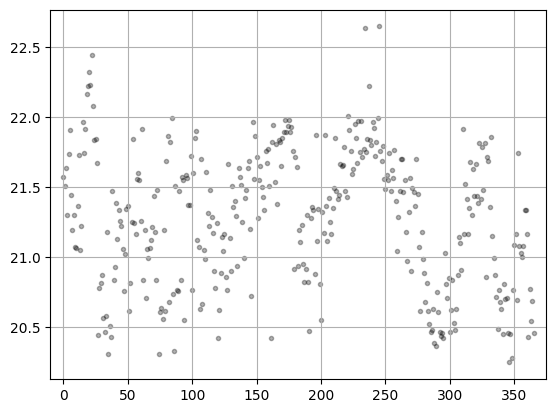

异常值个数: 7 个


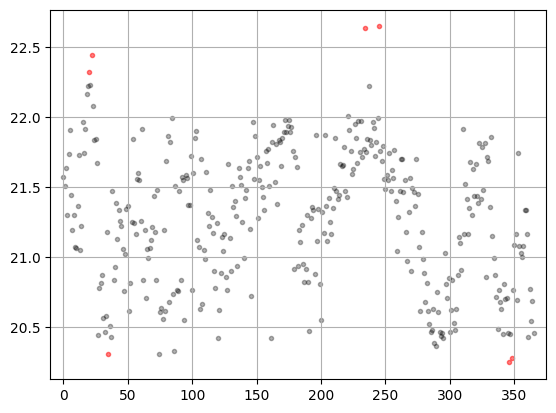

异常值个数: 0 个


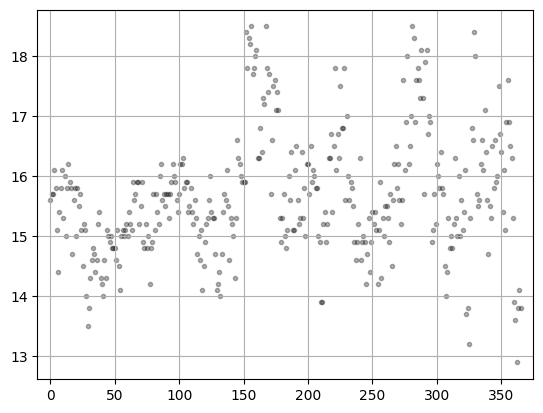

异常值个数: 25 个


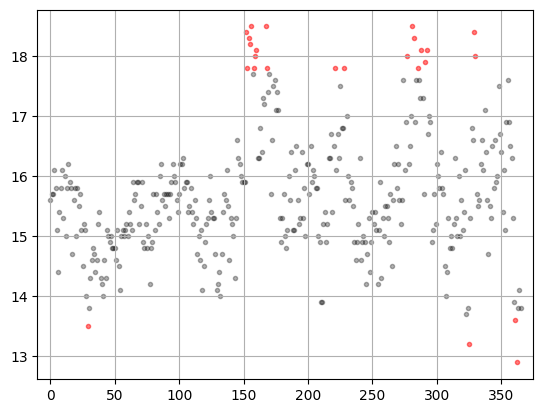

异常值个数: 0 个


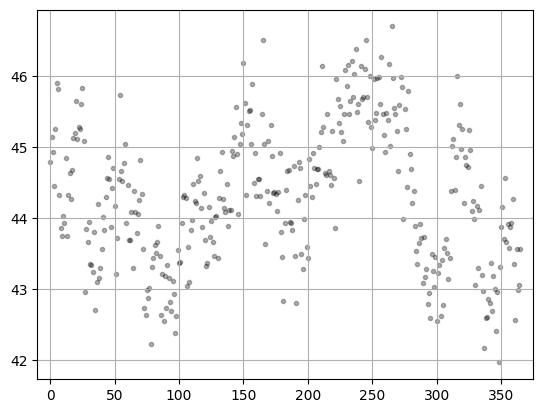

异常值个数: 8 个


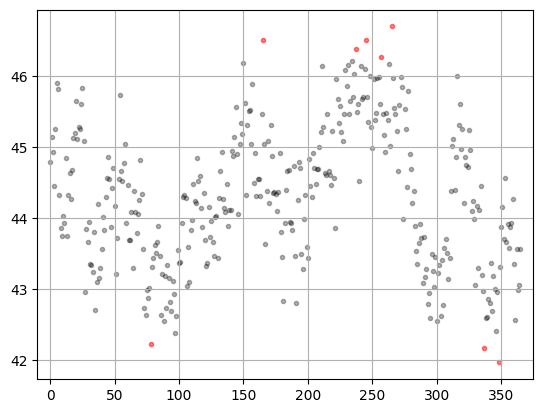

In [32]:
'''
任务3： 基于均值的异常检测：
                【统计方法】
                受检列列表：[①收到基低位发热量 Qnet,ar(MJ/kg),  ②全水分/收到基水分 Mt/Mar (%),  ③收到基固定碳  FCar(%)]     Customized 全列可检!
'''
baseDir = './Datas'
detected_column_list = ['收到基低位发热量 Qnet,ar(MJ/kg)','全水分/收到基水分 Mt/Mar (%)','收到基固定碳  FCar(%)']
for file in os.listdir(baseDir):
    path = os.path.join(baseDir,file)
    if path == './Datas\plant_12.xlsx':
        continue
    #print(path)
    df = pd.read_excel(path)
    for column_name in detected_column_list:
        data = df[column_name]
        "1. 3σ判别法" """
         a) 假设：数据服从正态分布
         b) 判别标准：异常值 < (μ-3σ) or 异常值 > (μ+3σ)
            其中，μ表示均值，σ表示标准差
        """
        # 统计量
        ave = data.mean()  # 均值
        std = data.std()   # 标准差

        # 判别
        abnormal = data[np.abs(data - ave) >= 3*std]  # 异常值
        normal = data[np.abs(data - ave) <= 3*std]    # 正常值
        print(f'异常值个数: {len(abnormal)} 个')

        # 图示结果
        plt.scatter(normal.index, normal, color='k', marker='.', alpha = 0.3)
        plt.scatter(abnormal.index, abnormal, color='r', marker='.', alpha = 0.5)
        plt.xlim([-10,375])
        plt.grid()
        plt.show()


        "2. z值判别法" """
         a) 假设：数据服从正态分布
         b) 判别标准：将数据x转换为z值，(x-μ)/σ
            z值反映了数据x到均值μ相差多少倍标准差。如果倍数过大，判定为异常值
         c) 可以看出，z值判别法和3σ判别法本质上相同
        """
        # z值
        z_value = (data - np.mean(data))/np.std(data)

        # 判别
        abnormal = data[abs(z_value) >= 2]  # 异常值（假定超过2倍标准差为异常值）
        normal = data[abs(z_value) < 2]     # 正常值
        print(f'异常值个数: {len(abnormal)} 个')

        # 图示结果
        plt.scatter(normal.index, normal, color='k', marker='.', alpha = 0.3)
        plt.scatter(abnormal.index, abnormal, color='r', marker='.', alpha = 0.5)
        plt.xlim([-10,375])
        plt.grid()
        plt.show()
    #print(df)
    break #注释掉break显示全部数据集结果

异常值个数：0 


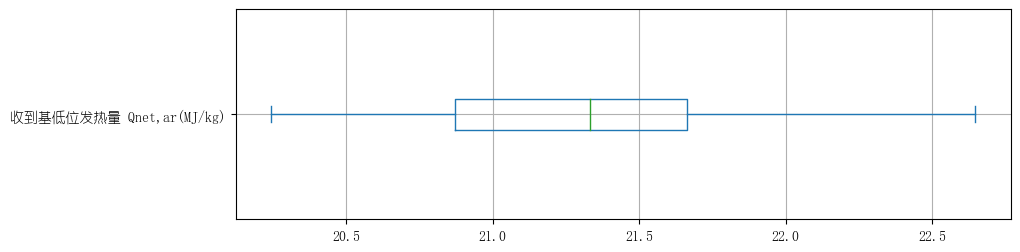

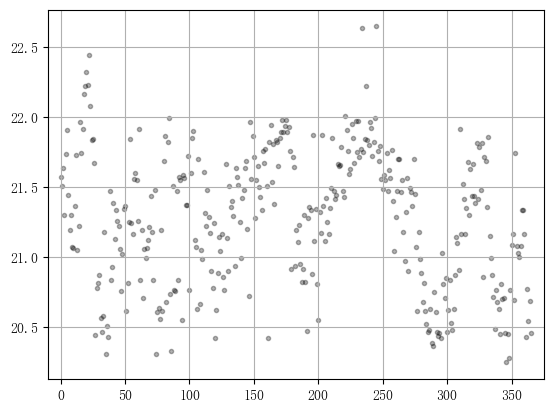

异常值个数：38 


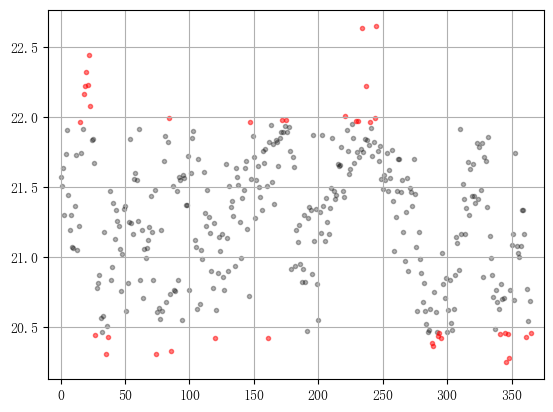

异常值个数：13 


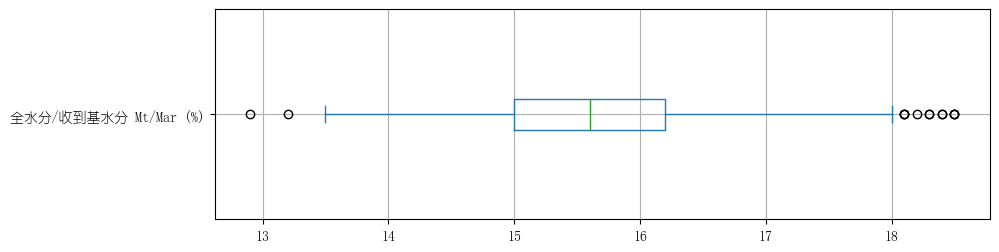

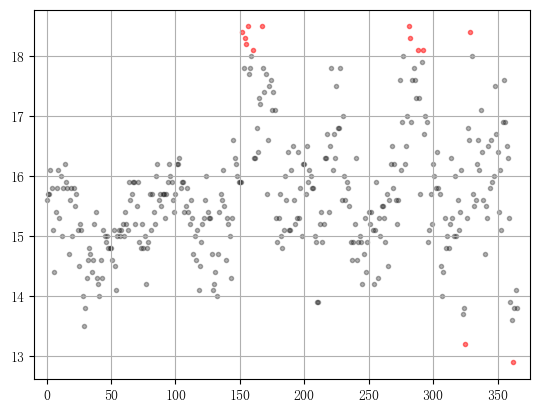

异常值个数：31 


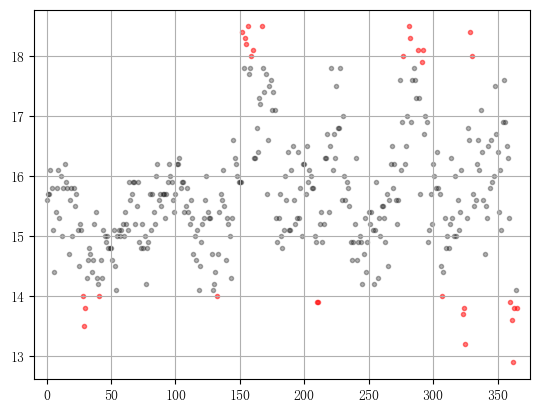

异常值个数：0 


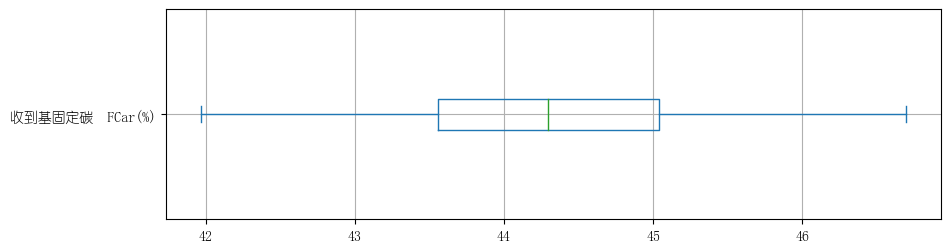

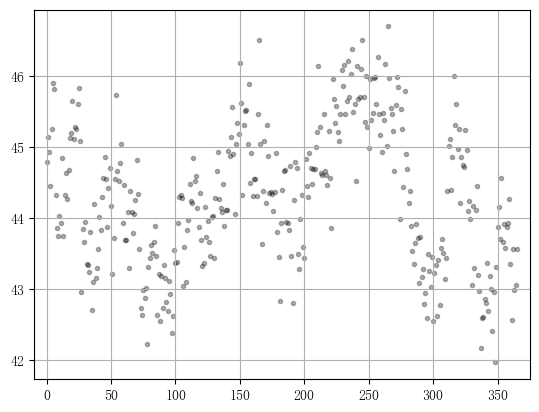

异常值个数：38 


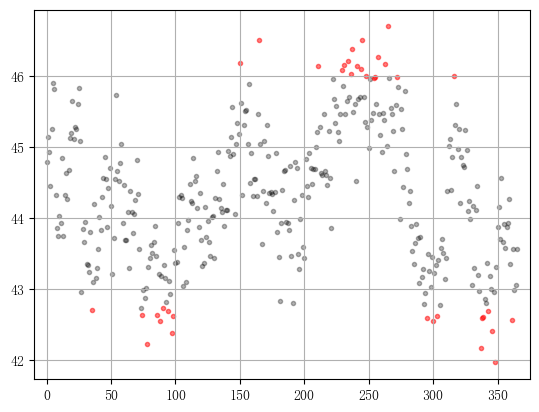

In [37]:
'''
任务4： 基于分布的异常检测：
                【统计方法】
                受检列列表：[①收到基低位发热量 Qnet,ar(MJ/kg),  ②全水分/收到基水分 Mt/Mar (%),  ③收到基固定碳  FCar(%)]   Customized 全列可检!
'''
baseDir = './Datas'
detected_column_list = ['收到基低位发热量 Qnet,ar(MJ/kg)','全水分/收到基水分 Mt/Mar (%)','收到基固定碳  FCar(%)']
for file in os.listdir(baseDir):
    path = os.path.join(baseDir,file)
    if path == './Datas\plant_12.xlsx':
        continue
    #print(path)
    df = pd.read_excel(path)
    for column_name in detected_column_list:
        data = df[column_name]

        "1. 四分位数判别法" """
         a) 分位差(interquartile range, IQR) = 3/4位数 - 1/4位数
         b) 判别标准：
            · 下限 = 1/4位数 - 1.5 * IQR
            · 上限 = 3/4位数 + 1.5 * IQR
            · 异常值：低于下限或高于上限
        """
        # 统计量
        q25 = data.quantile(q=0.25)  # 1/4位数
        q75 = data.quantile(q=0.75)  # 3/4位数
        iqr = q75 - q25  # 分位差
        l_lim = q25 - 1.5 * iqr  # 下限
        h_lim = q75 + 1.5 * iqr  # 上限

        # 判别
        abnormal = data[(data < l_lim) | (data > h_lim)]  # 异常值
        normal = data[(data >= l_lim) & (data <= h_lim)]  # 正常值
        print(f'异常值个数：{len(abnormal)} ')

        # 箱型图
        fig = plt.figure(figsize = (10,6))
        ax1 = fig.add_subplot(2,1,1)
        data.plot.box(vert=False, grid=True, ax = ax1)
        plt.show()

        # 图示结果
        ax2 = fig.add_subplot(2,1,2)
        plt.scatter(normal.index,normal,color = 'k',marker='.',alpha = 0.3)
        plt.scatter(abnormal.index,abnormal,color = 'r',marker='.',alpha = 0.5)
        plt.xlim([-10,375])
        plt.grid()
        plt.show()



        "2. 五九五分位数判别法"
        # 统计量
        l_lim = data.quantile(q=0.05)
        h_lim = data.quantile(q=0.95)

        # 判别
        abnormal = data[(data < l_lim) | (data > h_lim)]  # 异常值
        normal = data[(data >= l_lim) & (data <= h_lim)]  # 正常值
        print(f'异常值个数：{len(abnormal)} ')

        # 图示结果
        ax2 = fig.add_subplot(1,1,1)
        plt.scatter(normal.index,normal,color = 'k',marker='.',alpha = 0.3)
        plt.scatter(abnormal.index,abnormal,color = 'r',marker='.',alpha = 0.5)
        plt.xlim([-10,375])
        plt.grid()
        plt.show()
    break #注释掉break显示全部数据集结果

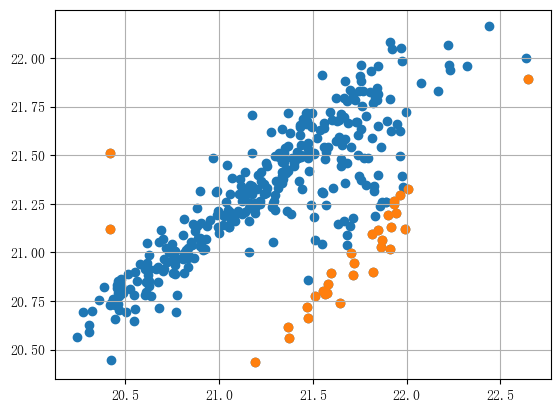

In [49]:
'''
任务5： 基于模型的异常检测：
                【模型方法】
                线性模型 scikit-learn: LinearRegression
                feature列列表：[①全水分/收到基水分 Mt/Mar (%),  ②收到基灰分 Aar(%),  ③收到基挥发分 Var(%), ④收到基固定碳  FCar(%), ⑤干燥基全硫St,d%]      features-Customized!
                label列列表：[收到基低位发热量 Qnet,ar(MJ/kg)]      label-Customized!
'''
baseDir = './Datas'
feature_list = ['全水分/收到基水分 Mt/Mar (%)','收到基灰分 Aar(%)','收到基挥发分 Var(%)','收到基固定碳  FCar(%)','干燥基全硫St,d%']
label_name = '收到基低位发热量 Qnet,ar(MJ/kg)'
for file in os.listdir(baseDir):
    path = os.path.join(baseDir,file)
    if path == './Datas\plant_12.xlsx':
        continue
    #print(path)
    df = pd.read_excel(path)

    # 数据
    x = df[feature_list]
    y = df[label_name]
    # 建模（本例采用线性回归模型）
    model = LinearRegression()
    model.fit(x, y)
    y_pred = pd.Series(model.predict(x))  # 计算预测值

    # 判别依据
    resid = y - y_pred        # 预测值与真实值的偏差
    meanResid = resid.mean()  # 偏差的均值
    stdResid = resid.std()    # 偏差的标准差
    z_value = (resid - meanResid) / stdResid  # 计算偏差的z值

    # 异常值
    outliers_idx = z_value[abs(z_value) > 2].index  # z值大于n（设为2）判定为异常值

    # 绘图
    plt.scatter(y, y_pred, color='C0')
    plt.scatter(y[outliers_idx], y_pred[outliers_idx], color='C1')
    plt.grid()
    plt.show()
    #print(df)

    break #注释掉break显示全部数据集结果


